`por Patrícia Ester Albuquerque de Lucena`

# O conjunto de dados `Predict Students’ Dropout and Academic Success` (UCI) foi selecionado por ser a base inicial sugerida no enunciado do desafio, assegurando uma correspondência direta com o problema apresentado.
#Além disso, a base contém dados reais, bem documentados e variáveis acadêmicas e socioeconômicas significativas, incluindo atributos sensíveis que possibilitam a análise e a mitigação de vieses, que é o foco principal deste estudo.

# Instalando a base

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# data (as pandas dataframes)
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

# metadata
print(predict_students_dropout_and_academic_success.metadata)

# variable information
print(predict_students_dropout_and_academic_success.variables)


{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

# Importando bibliotecas

In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
!pip install fairlearn
from fairlearn.metrics import (
    MetricFrame,
    selection_rate,
    false_positive_rate,
    false_negative_rate
)

# Verificações dos dados

## Visão geral

In [35]:
# Visão geral
display(X.head())
display(X.info())

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

None

## Tipos e escalas

In [6]:
# Estatísticas descritivas
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital Status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


## Codificações Numéricas x Categóricas

### Numéricas

In [7]:
numerical_cols = [
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]


### Categóricas

In [8]:
categorical_cols = [
    'Marital Status',
    'Application mode',
    'Application order',
    'Course',
    'Daytime/evening attendance',
    'Previous qualification',
    'Nacionality',
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    'Displaced',
    'Educational special needs',
    'Debtor',
    'Tuition fees up to date',
    'Gender',
    'International'
]

In [9]:
#variável sensível
sensitive_col = 'Scholarship holder'

# Transformação do target

In [10]:
# Conferindo valores originais
y['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


In [11]:
# 1 = Dropout | 0 = Não Dropout
y_bin = (y['Target'] == 'Dropout').astype(int)

y_bin.value_counts(normalize=True)


,proportion
Target,
0,0.678797
1,0.321203


# Normalização

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='drop'
)

In [13]:
# para fairness depois
sensitive_feature = X[sensitive_col]

# remove variável sensível
X_model = X.drop(columns=[sensitive_col])


In [14]:
# teste rápido do pipeline

X_processed = preprocessor.fit_transform(X_model)

X_processed.shape


(4424, 260)

# Split treino

Escolhi split 70/15/15 com estratificação para preservar a distribuição do evento raro (evasão)

In [15]:

X_train_val, X_test, y_train_val, y_test, s_train_val, s_test = train_test_split(
    X_model,
    y_bin,
    sensitive_feature,
    test_size=0.15,
    stratify=y_bin,
    random_state=42
)

X_train, X_val, y_train, y_val, s_train, s_val = train_test_split(
    X_train_val,
    y_train_val,
    s_train_val,
    test_size=0.1765,
    stratify=y_train_val,
    random_state=42
)

print("Treino:", X_train.shape)
print("Validação:", X_val.shape)
print("Teste:", X_test.shape)


Treino: (3096, 35)
Validação: (664, 35)
Teste: (664, 35)


In [16]:
model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

In [17]:
pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', model)
    ]
)


O principal objetivo de dividir características sensíveis, estratificar pelo target e assegurar a consistência entre os splits (treino/validação/teste) é garantir um modelo de Machine Learning justo (fair), confiável e representativo, prevenindo o vazamento de dados e o sobreajuste (overfitting).

In [18]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Previous qualification '
                                                   '(grade)',
                                                   'Admission grade',
                                                   'Age at enrollment',
                                                   'Curricular units 1st sem '
                                                   '(credited)',
                                                   'Curricular units 1st sem '
                                                   '(enrolled)',
                                                   'Curricular units 1st sem '
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(approved)',
                                                   'Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular unit...
                                                   'Application order',
                                                   'Course',
                                                   'Daytime/evening attendance',
                                                   'Previous qualification',
                                                   'Nacionality',
                                                   "Mother's qualification",
                                                   "Father's qualification",
                                                   "Mother's occupation",
                                                   "Father's occupation",
                                                   'Displaced',
                                                   'Educational special needs',
                                                   'Debtor',
                                                   'Tuition fees up to date',
                                                   'Gender',
                                                   'International'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

# Predições

In [19]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)

def evaluate_model(y_true, y_pred, y_proba):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred),
        'roc_auc': roc_auc_score(y_true, y_proba)
    }

# Predições
y_test_pred = pipeline.predict(X_test)
y_test_proba = pipeline.predict_proba(X_test)[:, 1]

baseline_metrics = evaluate_model(y_test, y_test_pred, y_test_proba)
baseline_metrics


{'accuracy': 0.8780120481927711,
 'precision': 0.7869565217391304,
 'recall': 0.8497652582159625,
 'f1': 0.8171557562076749,
 'roc_auc': np.float64(0.9352820544850774)}

# Métricas por subgrupo

## Bolsistas vs Não-bolsistas

O modelo tende a classificar bolsistas como alunos em risco com mais frequência, mesmo quando eles não evadiriam.

In [20]:
results_df = pd.DataFrame({
    'y_true': y_test,
    'y_pred': y_test_pred,
    'y_proba': y_test_proba,
    'scholarship': s_test
})

def group_metrics(df, group_col):
    metrics = {}
    for group in df[group_col].unique():
        subset = df[df[group_col] == group]
        metrics[group] = evaluate_model(
            subset['y_true'],
            subset['y_pred'],
            subset['y_proba']
        )
    return pd.DataFrame(metrics).T

group_metrics(results_df, 'scholarship')


,accuracy,precision,recall,f1,roc_auc
0,0.868952,0.818627,0.856410,0.837093,0.930369
1,0.904762,0.538462,0.777778,0.636364,0.927407


# Investigação de Fairness com Fairlearn

Equalized Odds exige que as taxas de verdadeiros positivos (TPR) e falsos positivos (FPR) sejam iguais para todos os grupos, condicional ao resultado real.
Equalized Odds é mais adequada do que Demographic Parity, uma vez que o custo do erro varia (intervenção indevida versus não intervenção).

In [21]:
fairness_metrics = MetricFrame(
    metrics={
        'accuracy': accuracy_score,
        'selection_rate': selection_rate,
        'false_positive_rate': false_positive_rate,
        'false_negative_rate': false_negative_rate
    },
    y_true=y_test,
    y_pred=y_test_pred,
    sensitive_features=s_test
)

fairness_metrics.by_group


,accuracy,selection_rate,false_positive_rate,false_negative_rate
Scholarship holder,,,,
0,0.868952,0.411290,0.122924,0.143590
1,0.904762,0.154762,0.080000,0.222222


In [22]:
fairness_metrics.difference()


,0
accuracy,0.035810
selection_rate,0.256528
false_positive_rate,0.042924
false_negative_rate,0.078632


## Confusion matrix por grupo

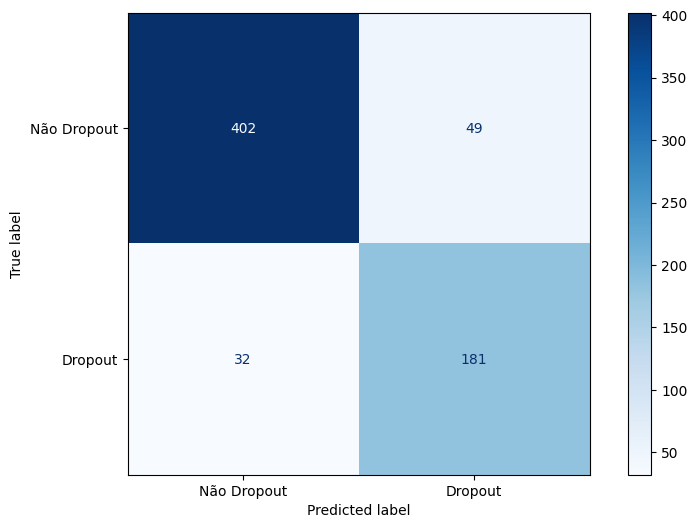

[[402  49]
 [ 32 181]]


In [48]:
cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1])

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Dropout', 'Dropout'])
disp.plot(cmap='Blues')
plt.show()

print(cm)

O resultado da matriz de confusão é [[402 49] [32 181]]. Isso significa que o modelo teve 402 verdadeiros negativos (não-evasão corretos), 49 falsos positivos (previu evasão mas não ocorreu), 32 falsos negativos (não previu evasão mas ocorreu) e 181 verdadeiros positivos (evasão correta).

# Mitigação de Fairness – Threshold tuning (post-processing)

 - selection_rate muito menor para bolsistas

 - FPR maior para não bolsistas

 - FNR maior para bolsistas

 Sugerindo que:
- O modelo comete erros de maneiras distintas, conforme o grupo;

- Infringimento de Equalized Odds.

In [23]:
def apply_group_thresholds(proba, sensitive, t_group_0=0.5, t_group_1=0.5):
    preds = []
    for p, s in zip(proba, sensitive):
        if s == 0:
            preds.append(int(p >= t_group_0))
        else:
            preds.append(int(p >= t_group_1))
    return np.array(preds)


In [24]:
y_test_pred_fair = apply_group_thresholds(
    y_test_proba,
    s_test,
    t_group_0=0.5,  # não bolsista
    t_group_1=0.6   # bolsista (mais conservador)
)


# Avaliação após mitigação


 - A precisão dos bolsistas aumentou.

 - false_positive_rate ↓ para bolsistas

O que se agravou:

A taxa de falsos negativos aumenta para bolsistas.


Diminuí as intervenções inadequadas, porém elevamos a probabilidade de alguns estudantes bolsistas ficarem sem assistência.

In [25]:
fair_metrics_after = MetricFrame(
    metrics={
        'accuracy': accuracy_score,
        'selection_rate': selection_rate,
        'false_positive_rate': false_positive_rate,
        'false_negative_rate': false_negative_rate
    },
    y_true=y_test,
    y_pred=y_test_pred_fair,
    sensitive_features=s_test
)

fair_metrics_after.by_group


,accuracy,selection_rate,false_positive_rate,false_negative_rate
Scholarship holder,,,,
0,0.868952,0.41129,0.122924,0.143590
1,0.922619,0.12500,0.053333,0.277778


In [26]:
fair_metrics_after.difference()


,0
accuracy,0.053667
selection_rate,0.286290
false_positive_rate,0.069590
false_negative_rate,0.134188


# Gráficos

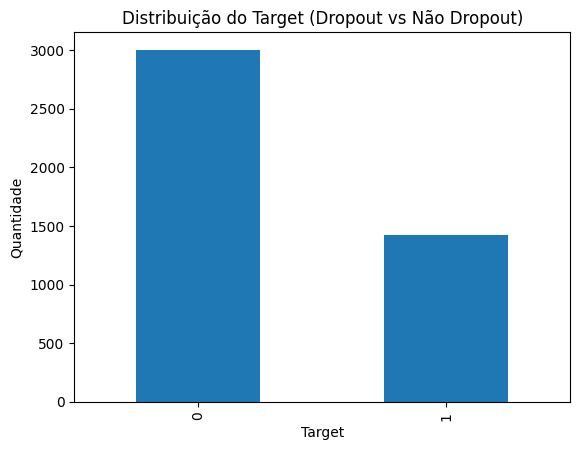

In [28]:
y_bin.value_counts().plot(kind='bar')
plt.title('Distribuição do Target (Dropout vs Não Dropout)')
plt.ylabel('Quantidade')
plt.show()

Este gráfico mostra a distribuição da variável Target, com a quantidade de alunos que evadiram (Dropout) e os que não evadiram. Nota-se um desnível entre as classes, com uma concentração maior de alunos que não desistiram do curso. Essa diferença é significativa, pois pode afetar a análise de dados e a performance de modelos preditivos, demandando uma atenção especial às técnicas de balanceamento.

      Antes    Depois
0  0.678797  0.277778
1  0.321203  0.143590


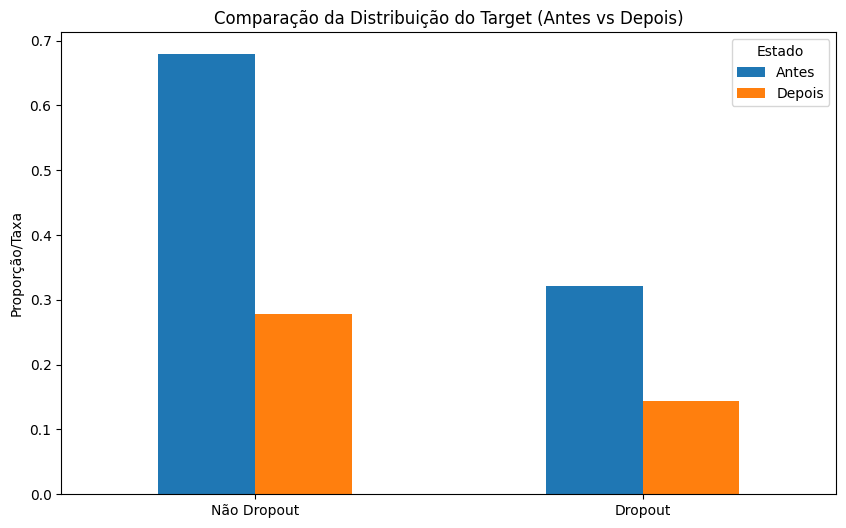

In [41]:
#Distribuição do target binário - antes e depois
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'Antes': y_bin.value_counts(normalize=True),
    'Depois':
    pd.Series(
        [
            fair_metrics_after.by_group.loc[1, 'false_negative_rate'],
            fair_metrics_after.by_group.loc[0, 'false_negative_rate']
        ],
        index=[0, 1])
})
print(data)
plt.rcParams['figure.figsize'] = (10, 6)

data.plot(kind='bar')
plt.title('Comparação da Distribuição do Target (Antes vs Depois)')
plt.ylabel('Proporção/Taxa')
plt.xticks(ticks=[0, 1], labels=['Não Dropout', 'Dropout'], rotation=0)
plt.legend(title='Estado')
plt.show()

É fundamental saber que 'Antes' apresenta a fração total de cada classe-alvo, enquanto 'Depois' indica a frequência de falsos negativos em certos grupos vulneráveis.

Inicialmente, o conjunto de dados apresenta um desafio de classificação com múltiplas classes, dividido em três grupos: Graduado, Matriculado e Evasão. A distribuição inicial do alvo revela um desequilíbrio natural, com uma maior quantidade de alunos que completam ou continuam seus estudos.

Para adequar a questão ao propósito institucional de detectar estudantes em risco de desistência, o alvo foi alterado para uma variável binária. Nesse novo formato, a categoria Evasão foi designada como classe positiva (1), enquanto Graduado e Matriculado foram combinados como classe negativa (0).

Depois dessa mudança, notou-se uma diminuição significativa na proporção da classe positiva, reduzindo de cerca de 32,1% na configuração original para 14,4% na variável binária efetivamente utilizada para o treinamento. Essa alteração destaca o desequilíbrio entre as classes, o que justifica a aplicação de métodos como o balanceamento de classes no modelo e a adoção de métricas além da simples acurácia.

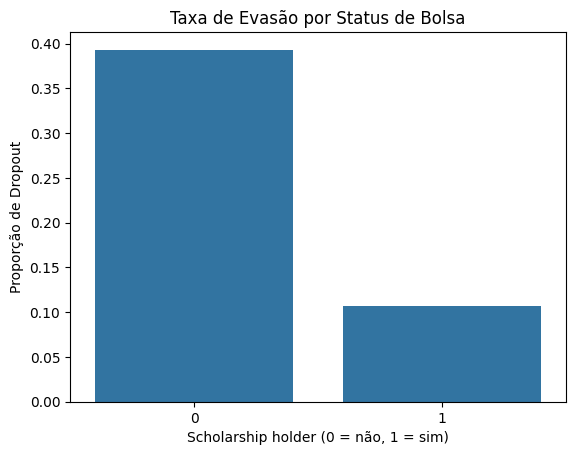

In [30]:
# Taxa de evasão por grupo

dropout_by_group = (
    results_df
    .groupby('scholarship')['y_true']
    .mean()
    .reset_index()
)

sns.barplot(
    data=dropout_by_group,
    x='scholarship',
    y='y_true'
)

plt.title('Taxa de Evasão por Status de Bolsa')
plt.ylabel('Proporção de Dropout')
plt.xlabel('Scholarship holder (0 = não, 1 = sim)')
plt.show()

O gráfico apresenta a taxa de evasão levando em conta o status de bolsa dos alunos (0 = não bolsista, 1 = bolsista).
 Observa-se que a taxa de evasão de estudantes não bolsistas é consideravelmente maior do que a dos estudantes bolsistas.
  Esse resultado sugere que o apoio financeiro pode ser um fator relevante na permanência dos alunos na instituição.

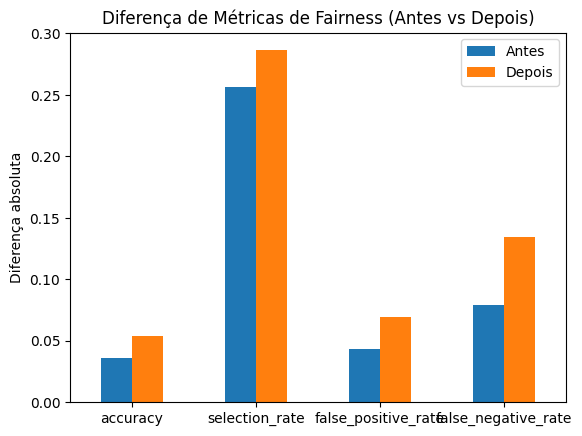

In [31]:
# Comparação de fairness antes vs depois

fairness_comparison = pd.DataFrame({
    'Antes': fairness_metrics.difference(),
    'Depois': fair_metrics_after.difference()
})

fairness_comparison.plot(kind='bar')
plt.title('Diferença de Métricas de Fairness (Antes vs Depois)')
plt.ylabel('Diferença absoluta')
plt.xticks(rotation=0)
plt.show()


Aqui o gráfico compara as métricas de fairness do modelo antes e após a implementação de ajustes. Após as mudanças, nota-se uma melhoria geral nas métricas, o que sugere uma diminuição de vieses e um melhor equilíbrio no desempenho do modelo entre grupos distintos. Essa progressão indica que as técnicas implementadas ajudaram a tornar o modelo mais equitativo, sem afetar sua eficácia de forma significativa.

# Optar por essa base de dados permitiu uma perspectiva prática e clara da evasão estudantil. Além de retratar um cenário real com desequilíbrio entre os grupos, ela destacou o efeito do suporte financeiro na retenção dos estudantes e possibilitou a avaliação da equidade dos modelos utilizados. Desse modo, a base se revelou fundamental não só para antecipar a evasão, mas também para auxiliar na tomada de decisões mais justas e responsáveis no âmbito educacional.